<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

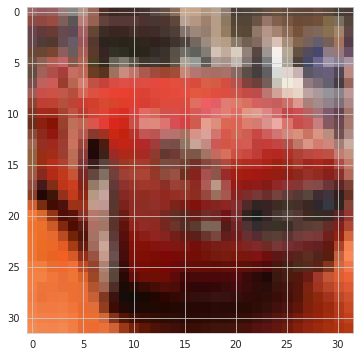

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

array([1], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [ ]:
# pd.Series(y_train.flatten()).value_counts()

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
y_train[0]

array([6], dtype=uint8)

In [14]:
classes[y_train[0][0]]

'frog'

In [15]:
classes[int(y_train[0])]

'frog'

In [ ]:
#int(np.random.randint(low=0, high=50000, size=1))

In [ ]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

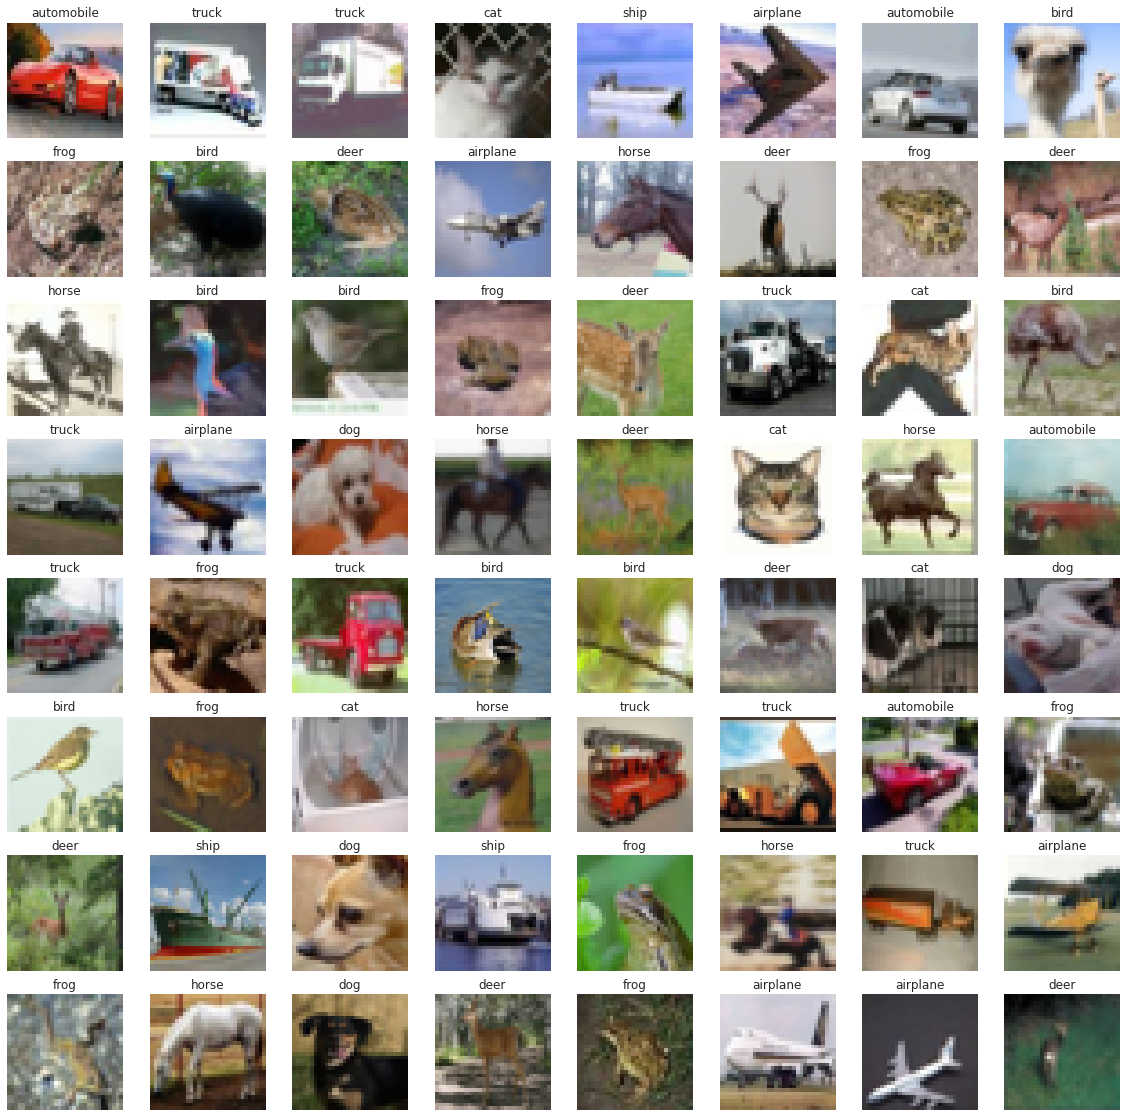

In [16]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [17]:
X_train[5].min()

0

In [18]:
X_train[5].max()

252

In [19]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[5].min()

0.0

In [21]:
X_train[5].max()

0.9882353

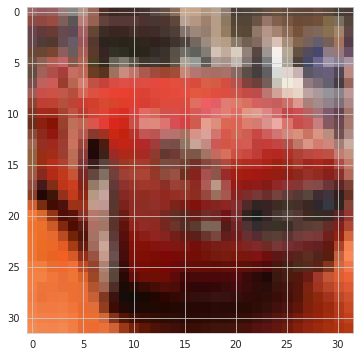

In [22]:
plt.imshow(X_train[5])

In [23]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [24]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [27]:
y_train[0]

array([6], dtype=uint8)

In [28]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               3

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights = True, mode="max")

In [44]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5673 - accuracy: 0.8010 - val_loss: 0.9256 - val_accuracy: 0.7024
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5064 - accuracy: 0.8216 - val_loss: 0.9706 - val_accuracy: 0.6985
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4530 - accuracy: 0.8402 - val_loss: 0.9913 - val_accuracy: 0.6974


In [45]:
model.metrics_names

['loss', 'accuracy']

In [46]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.567,0.801,0.926,0.702
1,0.506,0.822,0.971,0.698
2,0.453,0.840,0.991,0.697


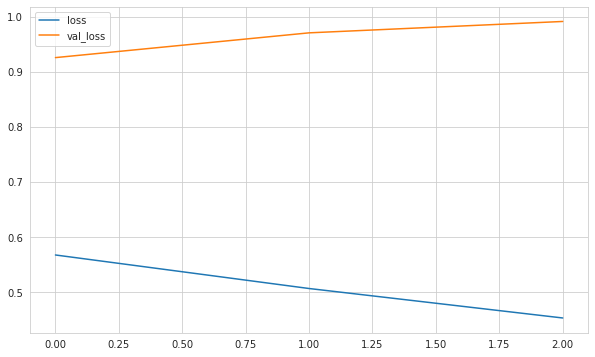

In [47]:
summary[["loss", "val_loss"]].plot();

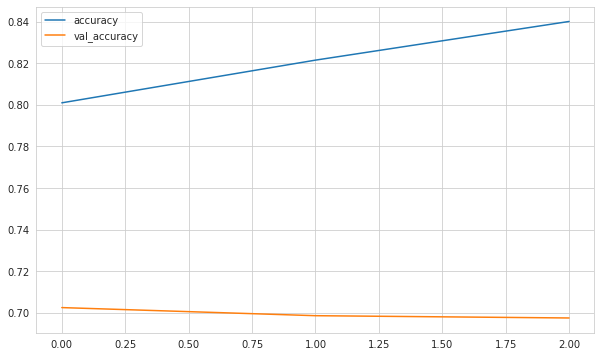

In [48]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9256 - accuracy: 0.7024


[0.9256331324577332, 0.7024000287055969]

In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9256331324577332
Test accuracy: 0.7024000287055969


In [52]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[2.45092611e-04, 7.03671612e-05, 5.06976340e-03, ...,
        8.55850708e-03, 4.52559965e-04, 4.10101580e-04],
       [5.39004868e-05, 2.08140481e-02, 2.60516586e-08, ...,
        4.39341719e-09, 9.79011714e-01, 1.18684984e-04],
       [4.58899103e-02, 3.29901055e-02, 6.26719906e-04, ...,
        6.79148710e-04, 9.02283490e-01, 1.33307958e-02],
       ...,
       [3.84731975e-05, 1.70988387e-05, 1.53490016e-02, ...,
        1.00577250e-02, 8.13071383e-05, 1.49166401e-04],
       [1.00995451e-01, 5.20702600e-01, 3.26786079e-02, ...,
        3.95790115e-03, 9.20938037e-04, 6.53514144e-05],
       [4.68295951e-07, 2.84741691e-06, 4.29536267e-05, ...,
        9.72164035e-01, 1.36163737e-06, 6.61066053e-07]], dtype=float32)

In [53]:
y_pred = np.argmax(pred_prob, axis=1)

In [54]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.87      0.80      0.83      1000
           2       0.75      0.46      0.57      1000
           3       0.51      0.46      0.48      1000
           4       0.69      0.62      0.65      1000
           5       0.49      0.77      0.60      1000
           6       0.79      0.78      0.78      1000
           7       0.75      0.78      0.76      1000
           8       0.76      0.85      0.80      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000



In [56]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [57]:
print(confusion_matrix(y_test, y_pred))

[[724  15  24  23  22  20   8  19  97  48]
 [ 12 797   4  17   4  14  11   2  44  95]
 [ 65   3 457  81 103 142  55  58  25  11]
 [ 14   5  34 458  50 326  47  31  19  16]
 [ 17   5  36  71 618 104  53  76  18   2]
 [ 13   2  14 106  27 768  12  43  11   4]
 [ 10   3  21  68  27  72 775   7  13   4]
 [ 12   5  13  31  42 100   5 784   4   4]
 [ 42  20   6  22   6  14   4   8 855  23]
 [ 24  63   4  24   3  21   9  24  40 788]]


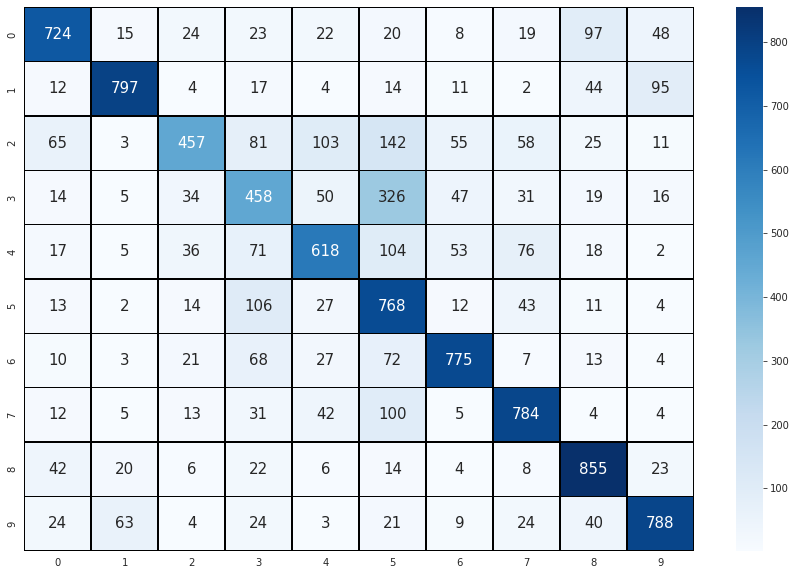

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [73]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [75]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4318 - accuracy: 0.4799 - val_loss: 1.0506 - val_accuracy: 0.6331
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0205 - accuracy: 0.6401 - val_loss: 0.9047 - val_accuracy: 0.6838
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8830 - accuracy: 0.6886 - val_loss: 0.8553 - val_accuracy: 0.7026
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8009 - accuracy: 0.7202 - val_loss: 0.7759 - val_accuracy: 0.7362
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7435 - accuracy: 0.7385 - val_loss: 0.7299 - val_accuracy: 0.7459
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6916 - accuracy: 0.7556 - val_loss: 0.7265 - val_accuracy: 0.7481
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6559 - accuracy: 0.7680 - val_loss: 0.7247 - val_acc

In [76]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.432,0.480,1.051,0.633
1,1.021,0.640,0.905,0.684
2,0.883,0.689,0.855,0.703
3,0.801,0.720,0.776,0.736
4,0.744,0.739,0.730,0.746
5,0.692,0.756,0.727,0.748
6,0.656,0.768,0.725,0.750
7,0.622,0.779,0.696,0.757
8,0.593,0.790,0.667,0.770
9,0.565,0.800,0.702,0.762


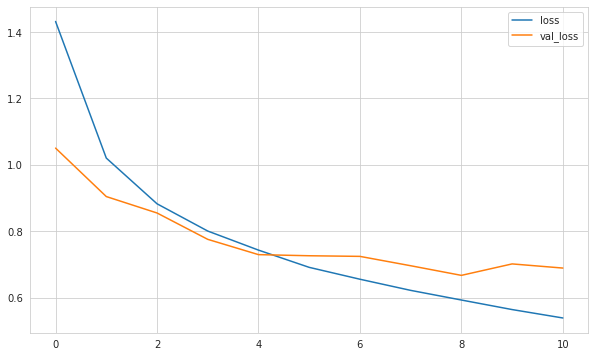

In [77]:
summary[["loss", "val_loss"]].plot();

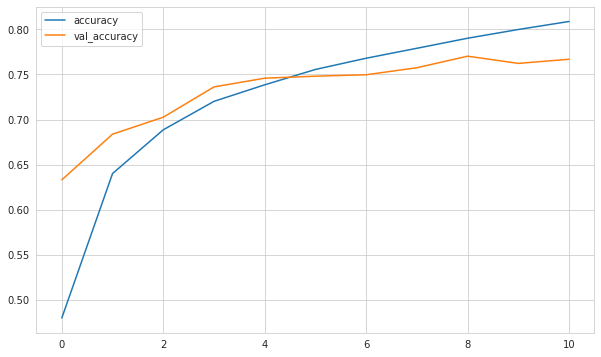

In [78]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [79]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6675 - accuracy: 0.7703


[0.667496919631958, 0.7702999711036682]

In [80]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.667496919631958
Test accuracy: 0.7702999711036682


In [81]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [82]:
y_pred = np.argmax(pred_prob, axis=1)

In [83]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.90      0.86      0.88      1000
           2       0.69      0.64      0.66      1000
           3       0.54      0.65      0.59      1000
           4       0.76      0.70      0.73      1000
           5       0.75      0.62      0.68      1000
           6       0.82      0.83      0.82      1000
           7       0.76      0.86      0.81      1000
           8       0.85      0.88      0.87      1000
           9       0.89      0.84      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



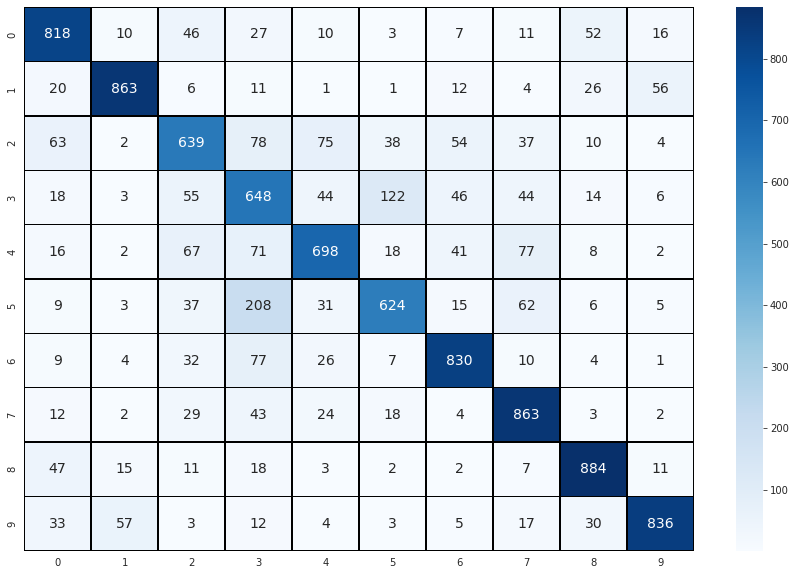

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [86]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [87]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [88]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [90]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 19s 11ms/step - loss: 1.9555 - accuracy: 0.2959 - val_loss: 1.5772 - val_accuracy: 0.4223
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4554 - accuracy: 0.4694 - val_loss: 1.4850 - val_accuracy: 0.4919
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2428 - accuracy: 0.5679 - val_loss: 1.0994 - val_accuracy: 0.6053
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1102 - accuracy: 0.6209 - val_loss: 1.2157 - val_accuracy: 0.5954
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0161 - accuracy: 0.6606 - val_loss: 0.7984 - val_accuracy: 0.7217
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9414 - accuracy: 0.6870 - val_loss: 0.7963 - val_accuracy: 0.7314
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8945 - accuracy: 0.7060 - val_loss: 0.7638 -

In [91]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
7,0.844,0.726,0.698,0.761
8,0.803,0.739,0.708,0.761
9,0.768,0.752,0.623,0.795
10,0.743,0.759,0.634,0.788
11,0.717,0.766,0.669,0.774


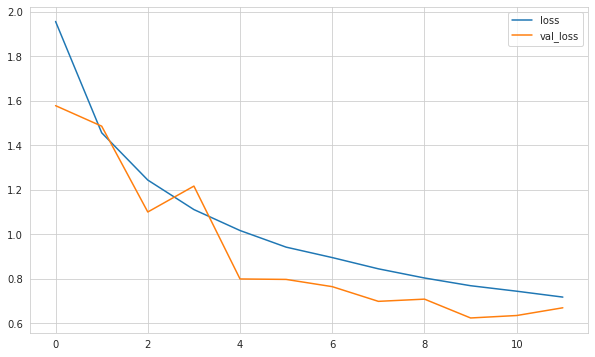

In [92]:
summary[["loss", "val_loss"]].plot();

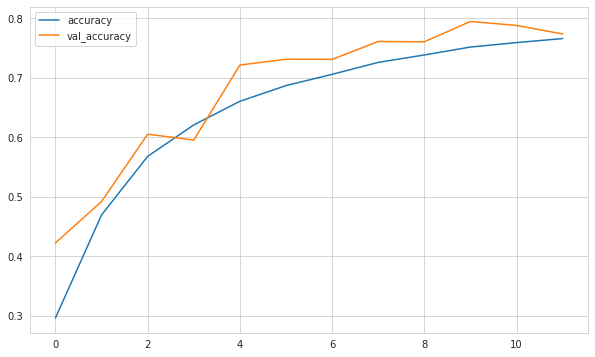

In [93]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [94]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6231 - accuracy: 0.7950


[0.6230792999267578, 0.7950000166893005]

In [95]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6230792999267578
Test accuracy: 0.7950000166893005


In [96]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [97]:
y_pred = np.argmax(pred_prob, axis=1)

In [98]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1000
           1       0.88      0.93      0.91      1000
           2       0.79      0.64      0.71      1000
           3       0.65      0.60      0.62      1000
           4       0.75      0.82      0.78      1000
           5       0.69      0.70      0.70      1000
           6       0.85      0.84      0.84      1000
           7       0.89      0.79      0.84      1000
           8       0.78      0.94      0.85      1000
           9       0.85      0.89      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.80      0.79     10000



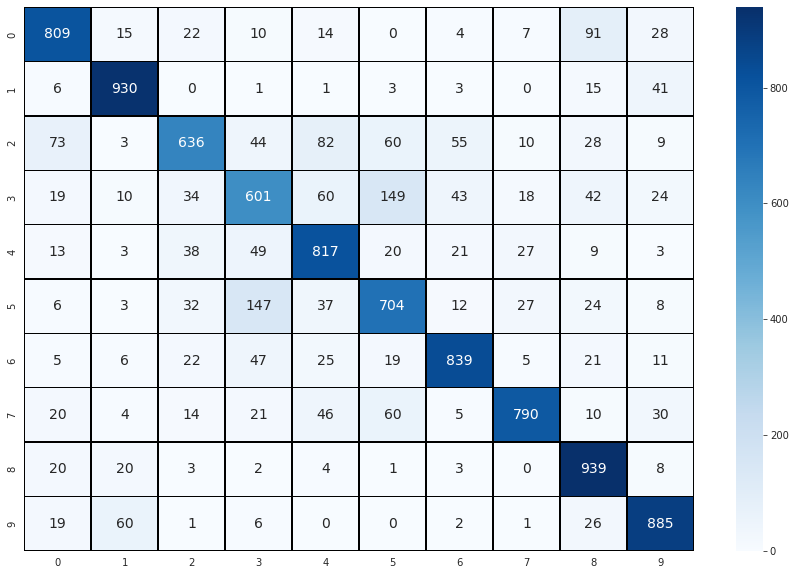

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [101]:
my_image = X_test[44]

In [102]:
my_image.shape

(32, 32, 3)

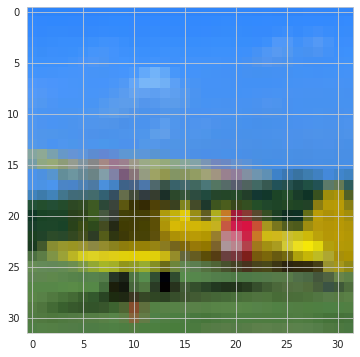

In [103]:
plt.imshow(my_image)

In [104]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 196ms/step


In [105]:
image_prediction

array([[9.9056143e-01, 4.8342402e-04, 1.6427835e-03, 2.9499744e-04,
        5.0700078e-04, 3.1653748e-05, 9.9517441e-05, 3.6489122e-04,
        3.7454425e-03, 2.2689435e-03]], dtype=float32)

In [106]:
np.argmax(image_prediction, axis=1)

array([0])

In [107]:
result=np.argmax(image_prediction, axis=1)

In [108]:
result

array([0])

In [109]:
classes[int(result)]

'airplane'

In [110]:
model.save("cnn-1.h5")

# finished

In [111]:
model=tf.keras.models.load_model('cnn-1.h5')

In [112]:
X_test[15].shape

(32, 32, 3)

In [113]:
np.expand_dims(X_test[15],axis=0).shape

(1, 32, 32, 3)

In [146]:
pred=model.predict(np.expand_dims(X_test[12],axis=0))

1/1 [==============================] - 0s 16ms/step


In [147]:
np.argmax(pred)

5

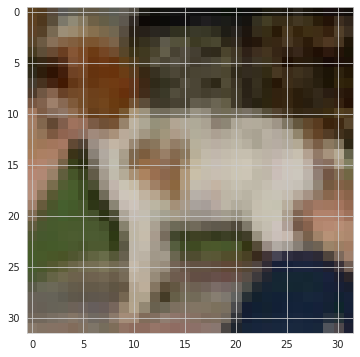

In [149]:
plt.imshow(X_test[12])

In [151]:
classes[5]

'dog'

In [130]:
from PIL import Image
import numpy as np

img = Image.open("/content/istockphoto-1136872455-1024x1024.jpg")
img = img.resize((32, 32))
img_array = np.array(img)

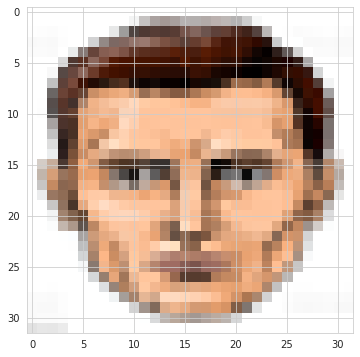

In [131]:
plt.imshow(img)

In [132]:
img_array.shape

(32, 32, 3)

In [133]:
np.expand_dims(img_array,axis=0).shape

(1, 32, 32, 3)

In [134]:
pred=model.predict(np.expand_dims(img_array,axis=0))
pred

1/1 [==============================] - 0s 207ms/step


array([[2.3806037e-25, 1.0000000e+00, 2.3897423e-37, 0.0000000e+00,
        0.0000000e+00, 1.4947436e-30, 0.0000000e+00, 7.6579451e-30,
        2.0615190e-28, 1.3272485e-22]], dtype=float32)

In [135]:
np.argmax(pred)

1

In [136]:
result=np.argmax(image_prediction, axis=1)


In [137]:
classes[int(result)]

'airplane'